In [3]:
import os
import pathlib
import tensorflow as tf
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from google.colab.patches import cv2_imshow


## cloning models 


In [4]:
!git clone https://github.com/tensorflow/models 

Cloning into 'models'...
remote: Enumerating objects: 85695, done.
remote: Counting objects: 100% (1294/1294), done.
remote: Compressing objects: 100% (531/531), done.
remote: Total 85695 (delta 816), reused 1203 (delta 757), pack-reused 84401
Receiving objects: 100% (85695/85695), 598.70 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (61318/61318), done.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!protoc

Usage: protoc [OPTION] PROTO_FILES
Parse PROTO_FILES and generate output based on the options given:
  -IPATH, --proto_path=PATH   Specify the directory in which to search for
                              imports.  May be specified multiple times;
                              directories will be searched in order.  If not
                              given, the current working directory is used.
  --version                   Show version info and exit.
  -h, --help                  Show this text and exit.
  --encode=MESSAGE_TYPE       Read a text-format message of the given type
                              from standard input and write it in binary
                              to standard output.  The message type must
                              be defined in PROTO_FILES or their imports.
  --decode=MESSAGE_TYPE       Read a binary message of the given type from
                              standard input and write it in text format
                              to standard 

In [7]:
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=.   


In [8]:
#!cd models/research/ && cp object_detection/packages/tf2/setup.py .&& \ python -m pip install .
!cd models/research/ && cp object_detection/packages/tf2/setup.py . && python -m pip install .


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Prep

In [9]:
#pip install --upgrade tensorflow


In [10]:
#pip install --upgrade keras


In [11]:
#pip install --upgrade tensorboard


In [12]:
#pip uninstall tensorflow keras tensorboard


In [13]:
#!pip install tensorflow==2.12.0 



In [14]:
#/content/models/research/object_detection/builders/model_builder_tf2_test.py

In [15]:
!cd models/research/ && python object_detection/builders/model_builder_tf2_test.py


2023-06-01 15:56:49.916856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Running tests under Python 3.10.11: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-06-01 15:56:57.710730: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0601 15:56:57.854071 1400

In [16]:
gpus=tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)



In [17]:
len(tf.config.list_physical_devices('GPU'))>0

True

In [18]:
!nvidia-smi

Thu Jun  1 15:57:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |      3MiB / 15360MiB |     30%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
!ls

drive  models  sample_data


In [20]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [21]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'


# LOADING THE MODEL

In [22]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz


--2023-06-01 15:57:47--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.10.128, 2404:6800:4003:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.10.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M  71.7MB/s    in 2.5s    

2023-06-01 15:57:50 (71.7 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03_29/saved_mod

In [23]:
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/walkingdog.jpeg
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/traffic.jpeg
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/jungle.jpeg
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/intersection.jpeg

--2023-06-01 15:57:53--  https://lazyprogrammer.me/course_files/object_detection_images/walkingdog.jpeg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195368 (191K) [image/jpeg]
Saving to: ‘walkingdog.jpeg’

walkingdog.jpeg     100%[===================>] 190.79K   298KB/s    in 0.6s    

2023-06-01 15:57:55 (298 KB/s) - ‘walkingdog.jpeg’ saved [195368/195368]

--2023-06-01 15:57:55--  https://lazyprogrammer.me/course_files/object_detection_images/traffic.jpeg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160514 (157K) [image/jpeg]
Saving to: ‘traffic.jpeg’

traffic.jpeg        100

In [24]:

model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')


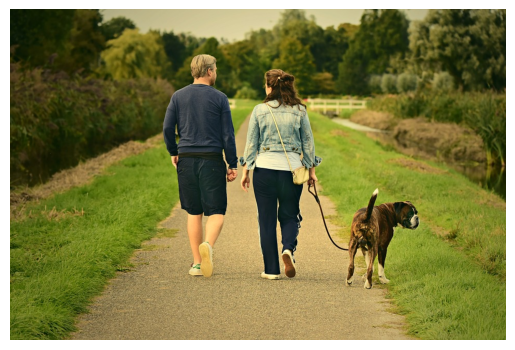

In [25]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('/content/walkingdog.jpeg')

# Convert BGR to RGB color format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis ticks
plt.show()


In [26]:
import tensorflow as tf
import cv2
import numpy as np

# Load the model
#model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')

# Get the model's input and output signatures
infer = model.signatures['serving_default']

# Load and preprocess the image
image = cv2.imread('/content/walkingdog.jpeg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis=0).astype(np.uint8)

# Convert the input image to a tensor
input_tensor = tf.convert_to_tensor(image)

# Run the inference
detections = infer(input_tensor)



In [27]:
image = np.squeeze(image)

image.shape

(640, 960, 3)

In [28]:
class_mapping = {
3: 'car'
}


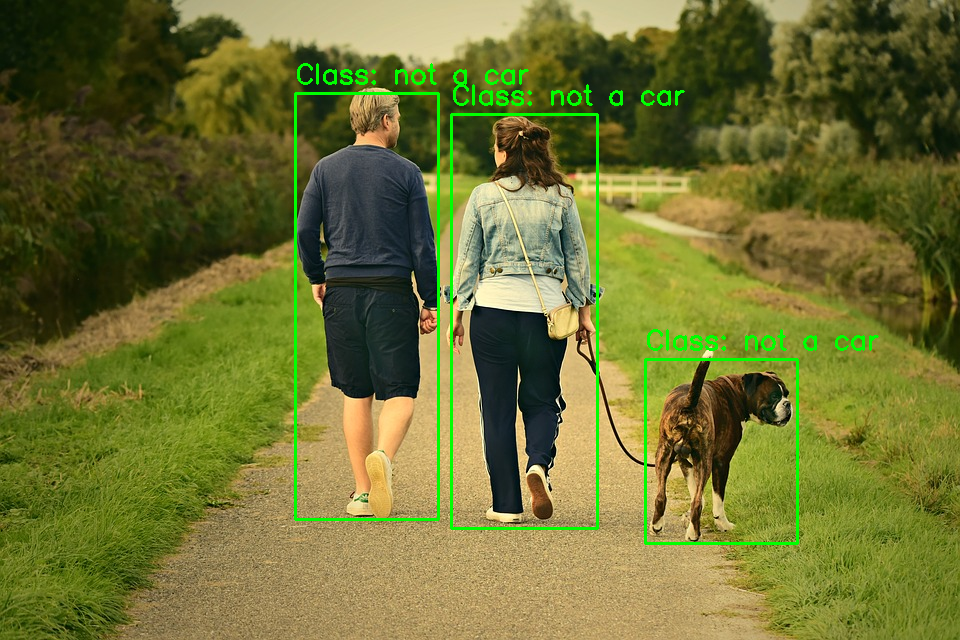

In [29]:

# Extract the bounding boxes, labels, and scores
boxes = detections['detection_boxes'][0].numpy()
classes = detections['detection_classes'][0].numpy().astype(np.int32)
scores = detections['detection_scores'][0].numpy()

# Set a threshold for the detection scores
score_threshold = 0.5

# Iterate over the detections and draw bounding boxes
for i in range(len(scores)):
    if scores[i] > score_threshold:
        ymin, xmin, ymax, xmax = boxes[i]
        ymin = int(ymin * image.shape[0])
        xmin = int(xmin * image.shape[1])
        ymax = int(ymax * image.shape[0])
        xmax = int(xmax * image.shape[1])
        
        class_number = classes[i]
        class_name = class_mapping.get(class_number, 'not a car')  # Get class name from mapping, default to 'Unknown' if not found

        label = f'Class: {class_name}'
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with detections
cv2_imshow(image)


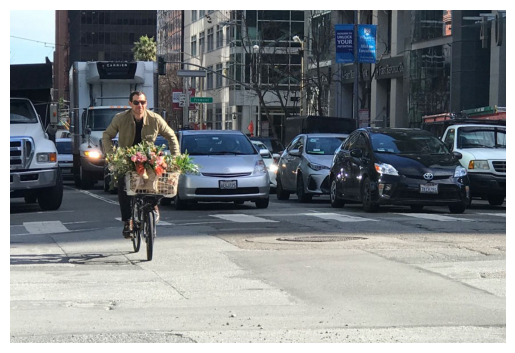

In [30]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('/content/traffic.jpeg')

# Convert BGR to RGB color format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis ticks
plt.show()


In [31]:
import tensorflow as tf
import cv2
import numpy as np

# Load the model
#model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')

# Get the model's input and output signatures
infer = model.signatures['serving_default']

# Load and preprocess the image
image = cv2.imread('/content/traffic.jpeg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis=0).astype(np.uint8)

# Convert the input image to a tensor
input_tensor = tf.convert_to_tensor(image)

# Run the inference
detections = infer(input_tensor)



In [32]:
image = np.squeeze(image)

image.shape

(586, 872, 3)

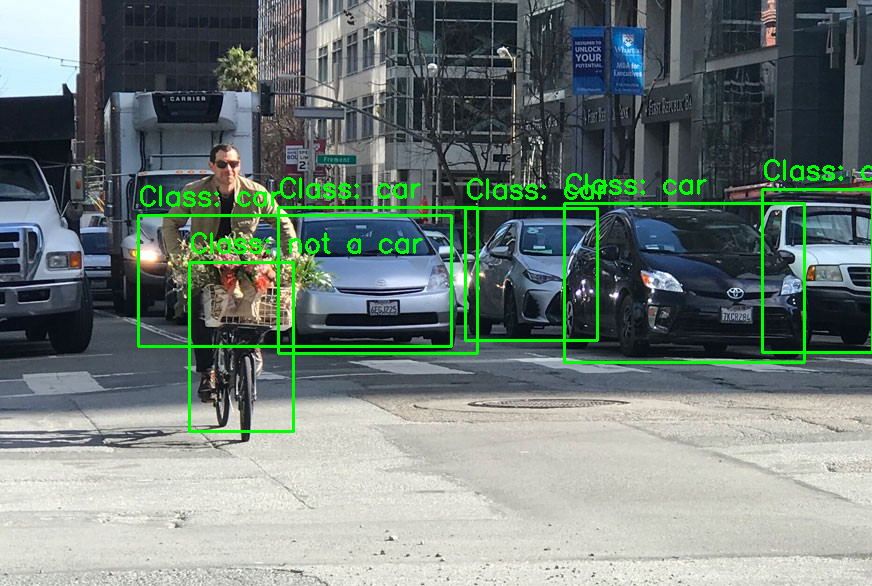

In [33]:
from google.colab.patches import cv2_imshow

# Extract the bounding boxes, labels, and scores
boxes = detections['detection_boxes'][0].numpy()
classes = detections['detection_classes'][0].numpy().astype(np.int32)
scores = detections['detection_scores'][0].numpy()

# Set a threshold for the detection scores
score_threshold = 0.5

# Iterate over the detections and draw bounding boxes
for i in range(len(scores)):
    if scores[i] > score_threshold:
        ymin, xmin, ymax, xmax = boxes[i]
        ymin = int(ymin * image.shape[0])
        xmin = int(xmin * image.shape[1])
        ymax = int(ymax * image.shape[0])
        xmax = int(xmax * image.shape[1])
        
        class_number = classes[i]
        class_name = class_mapping.get(class_number, 'not a car')  # Get class name from mapping, default to 'Unknown' if not found

        label = f'Class: {class_name}'
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with detections
cv2_imshow(image)
